In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
%matplotlib inline
from agent import Agent
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation

from simworld import SimWorld
from config import Config

In [2]:
agent = Agent(gamma=0.95, lr=0.008, input_shape=(Config.TileEncodingConfig.tiles*(Config.TileEncodingConfig.buckets ** 4)))

In [3]:
    
N = 300
T = 600
world = SimWorld()
histories = []
xs = []
ys = []
trials = np.ones((N)) * T
for episode in range(N):
    print(f"Episode {episode}")
    agent.reset_episode()

    world.set_initial_world_state()
    state0 = world.convert_internal_to_external_state()

    action0 = agent.select_action(state0.tile_encoding, use_cache=False)

    for t in range(T):  # T= timeout

        state1, reward, final = world.do_action(action0)

        agent.update(state=state0.tile_encoding, new_state=state1.tile_encoding,
                        action=action0, reward=reward, final=final)

        if final:

            trials[episode]=t
            print(f"Finished in {t} steps")
            break

        action1 = agent.select_action(state1, use_cache=True, epsilon=0.02)

        state0 = state1
        action0 = action1

    # Train model
    agent.update_weights()

    histories.append(world.internal_history)
    xs.append(world.x_history)
    ys.append(world.y_history)


Episode 0
27/27 [==============================] - 1s 7ms/step - loss: 0.3811
Episode 1
1/1 [==============================] - 0s 6ms/step - loss: 0.1513
Episode 2
1/1 [==============================] - 0s 6ms/step - loss: 0.2914
Episode 3
20/20 [==============================] - 0s 4ms/step - loss: 0.5371
Episode 4
23/23 [==============================] - 0s 4ms/step - loss: 0.4019
Episode 5
1/1 [==============================] - 0s 6ms/step - loss: 0.0042
Episode 6
2/2 [==============================] - 0s 5ms/step - loss: 0.6291
Episode 7
37/37 [==============================] - 0s 4ms/step - loss: 0.2060
Episode 8
3/3 [==============================] - 0s 9ms/step - loss: 0.7297
Episode 9
18/18 [==============================] - 0s 4ms/step - loss: 0.4955
Episode 10
6/6 [==============================] - 0s 4ms/step - loss: 0.8146
Episode 11
31/31 [==============================] - 0s 4ms/step - loss: 0.2783
Episode 12
1/1 [==============================] - 0s 8ms/step - loss: 0.27

In [4]:
# a = np.array(histories[99])
heights = []
for y in ys:
    m = y[0][2]
    for j in y:
        if j[2] > m:
            m = j[2]
    heights.append(m)

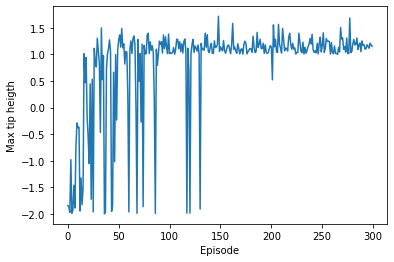

In [5]:
plt.plot(range(len(heights)), np.array(heights))
plt.xlabel('Episode') 
plt.ylabel('Max tip heigth') 
plt.show()

In [6]:
np.argmax(heights)

148

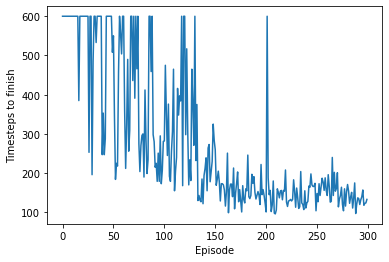

In [7]:
plt.plot(range(len(trials)), np.array(trials))
plt.xlabel('Episode') 
plt.ylabel('Timesteps to finish') 
plt.show()

In [8]:
np.argmin(trials)

209

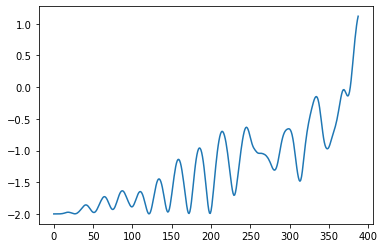

In [9]:
a = np.array(histories[209])
t = range(a.shape[0])
plt.plot(t[:4000], ((a[:4000,4])))

## Animations

In [19]:
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [11]:
run_no = 209
x = xs[run_no]
y = ys[run_no]

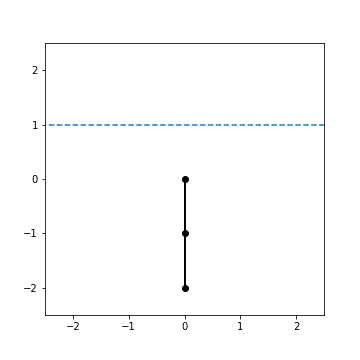

In [31]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set(xlim=(-2.5, 2.5), ylim=(-2.5, 2.5))

ax.plot((-3,3),(1,1), '--')
line = ax.plot(x[0], y[0], 'o-' , color='k', lw=2)[0]

def animate(i):
    line.set_xdata(x[i])
    line.set_ydata(y[i])
    # return line

# t = np.linspace(1, 25, 30)

anim = FuncAnimation(
    fig, animate, interval=20, frames=len(x))#, frames=len(t)-1)
# plt.axis('off')
plt.draw()
plt.show()

In [29]:
anim.save("./videos/96.gif", fps=30)

MovieWriter ffmpeg unavailable; using Pillow instead.
